In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500) #to not see elipses each time in displays of the dataframes
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [2]:
random_state = 88

In [3]:
# Common imports
import sys
assert sys.version_info >= (3, 5)
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import os
import seaborn as sns 

# For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Machine Learning and Results - All Code

In [10]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [11]:
combined_data_cleaned_2 = pd.read_excel("combined data final.xlsx") # PLEASE SPECIFY THE FILE PATH HERE

In [12]:
combined_data_cleaned_2.isnull().sum().sum()

0

In [13]:
from sklearn.model_selection import train_test_split

y = combined_data_cleaned_2["Presentations"].values # y is "presentations" column as numpy array. This represents the "ground truth"
x = combined_data_cleaned_2.drop(["Presentations","Local Authority"], axis=1).values # x is all data except "presentations" and "Local Authority" column. Representing all of the features

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=random_state,test_size=0.20) # Split data for train and test. 20% test 80% train

In [14]:
list(combined_data_cleaned_2.columns)

['Local Authority',
 'Presentations',
 'Children in Absolute Low Income',
 'Housing Waitlist',
 'Evictions',
 'Number of Deaths from Drug Misuse',
 'Welfare Claimant Count Age 16-24',
 'Total Population',
 'Population Aged 16-24',
 'Total Recorded Crime',
 'Total Domestic Abuse Incidents',
 'Total Drug Offences',
 'Median Earnings',
 'IMD - Average rank ',
 'IMD - Rank of average rank',
 'IDACI - Average rank',
 'IDACI - Rank of average rank ',
 'Income Deprivation - Average rank ',
 'Income Deprivation - Rank of average rank ']

In [15]:
x_df = pd.DataFrame(x) #just to view the independent variables to be used for all machine learning
x_df.columns = ['Children in Absolute Low Income',
 'Housing Waitlist',
 'Evictions',
 'Number of Deaths from Drug Misuse',
 'Welfare Claimant Count Age 16-24',
 'Total Population',
 'Population Aged 16-24',
 'Total Recorded Crime',
 'Total Domestic Abuse Incidents',
 'Total Drug Offences',
 'Median Earnings',
 'IMD - Average rank ',
 'IMD - Rank of average rank ',
 'IDACI - Average rank ',
 'IDACI - Rank of average rank ',
 'Income Deprivation - Average rank ',
 'Income Deprivation - Rank of average rank ']

x_df

,Children in Absolute Low Income,Housing Waitlist,Evictions,Number of Deaths from Drug Misuse,Welfare Claimant Count Age 16-24,Total Population,Population Aged 16-24,Total Recorded Crime,Total Domestic Abuse Incidents,Total Drug Offences,Median Earnings,IMD - Average rank,IMD - Rank of average rank,IDACI - Average rank,IDACI - Rank of average rank,Income Deprivation - Average rank,Income Deprivation - Rank of average rank
0,8488.0,6218.0,4.0,14.0,1650.0,461847.0,56852.0,30204.0,1886.04475,1007.0,34919.0,9856.0700,251.0,11645.8500,242.0,9708.8100,266.0
1,2053.0,741.0,0.0,1.0,380.0,61182.0,5075.0,3947.0,795.36600,155.0,30250.0,14995.9200,164.0,16320.1000,151.0,15848.6000,143.0
2,2417.0,2585.0,0.0,11.0,440.0,96422.0,8282.0,6311.0,1619.88960,251.0,33339.0,17828.8000,109.0,15808.9000,161.0,15726.9200,147.0
3,2701.0,2035.0,0.0,6.0,590.0,122309.0,11093.0,7963.0,1687.86420,205.0,33614.0,14755.4900,167.0,16240.8900,154.0,15166.3200,160.0
4,4468.0,1054.0,4.0,3.0,670.0,149518.0,12484.0,10459.0,1943.73400,408.0,28876.0,15557.0600,149.0,16004.8300,159.0,15274.4900,156.0
5,3746.0,3474.0,1.0,2.0,830.0,119497.0,12135.0,9819.0,1649.05860,391.0,26446.0,20324.0800,63.0,22098.3300,37.0,20095.6400,60.0
6,4609.0,1246.0,2.0,3.0,800.0,117956.0,11929.0,10540.0,1533.42800,280.0,30198.0,15484.6300,152.0,17277.6900,134.0,15745.7100,146.0
7,2116.0,754.0,0.0,4.0,350.0,87740.0,7811.0,4965.0,1202.03800,201.0,31799.0,12339.0500,212.0,13027.7700,219.0,11949.4300,226.0
8,15232.0,5585.0,0.0,6.0,2375.0,185911.0,23260.0,19226.0,1952.06550,1672.0,32852.0,25551.8500,5.0,24727.8000,11.0,25142.6500,4.0
9,10942.0,3171.0,0.0,8.0,2340.0,356386.0,38210.0,27353.0,3742.05300,1199.0,36411.0,13803.3500,184.0,14486.1400,190.0,16104.1400,137.0


In [17]:
assert len(x_train) == len(y_train) #training data with and without presentations are equal

In [18]:
x_train = pd.DataFrame(x_train) #just to look at it if needed
x_test = pd.DataFrame(x_test) #just to look at it if needed

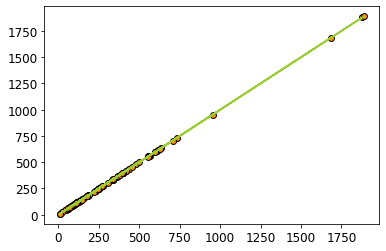

In [19]:
plt.figure() #visualization of test set --- just to show how it looks
plt.scatter(y_test, y_test, s=35, edgecolor="black", c="darkorange", label="data")
plt.plot(y_test, y_test, color="yellowgreen", label="max_depth=3", linewidth=1.5)
plt.show()

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [22]:
scaler.fit(x_test)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [23]:
x_train_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.483429,-0.330755,-0.335544,0.589650,0.656832,0.550922,0.229678,0.556541,0.377103,-0.068906,0.273286,-0.144219,0.124326,0.154996,-0.175090,0.065626,-0.099602
1,-0.456392,-0.466190,0.056624,-0.577994,-0.639332,-0.059161,-0.217545,-0.544064,-0.162695,-0.549650,1.200861,-2.176946,1.698207,-1.983304,1.685842,-2.044109,1.682391
2,-0.145517,-0.365387,0.361643,-0.383387,-0.324729,0.217450,-0.078238,-0.103266,-0.199890,0.001239,0.930901,-0.701965,0.725461,-0.360931,0.405083,-0.377378,0.414224
3,-0.517445,-0.344773,-0.335544,-0.675298,-0.643527,-0.618782,-0.582453,-0.527388,-0.601623,-0.575313,0.340227,-0.420583,0.441288,-0.312375,0.328457,-0.720833,0.796861
4,-0.475543,-0.244589,-0.335544,0.200435,-0.391845,-0.645650,-0.603260,-0.623066,-0.418433,-0.518855,0.289871,0.516507,-0.564247,-0.020823,0.000057,0.120414,-0.154265


In [24]:
x_test_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.097617,0.203745,-0.38438,0.525655,-0.352909,0.382923,0.031999,0.349212,0.553304,-0.379140,-0.063778,-0.325340,0.329420,-0.569130,0.615085,-0.358233,0.364432
1,-0.296715,-0.113801,-0.38438,-0.133991,-0.420940,0.434330,-0.059393,0.015017,-0.014605,-0.375721,-0.021920,-0.807401,0.844181,-0.725978,0.762083,-0.581831,0.638917
2,-0.450704,-0.000059,-0.38438,-0.353873,-0.614566,-0.727188,-0.407658,-0.361501,-0.645108,-0.490259,-0.474864,-0.133785,0.150372,0.015400,-0.029447,-0.149741,0.158568
3,0.283122,0.187889,-0.38438,0.085891,0.698950,2.016711,0.814969,0.469165,2.283509,-0.293664,0.316025,-0.891615,0.922515,-1.062895,1.191770,-1.051856,1.062082
4,-0.866355,-0.684412,-0.38438,-0.573754,-0.771560,-1.213601,-0.957166,-0.399440,-1.113122,-0.310759,-1.028045,0.064061,-0.073437,-0.317192,0.298473,-0.135821,0.124257


# Model Selection

### Decision Tree

In [25]:
regr_dt = DecisionTreeRegressor(max_depth=7, random_state = random_state)

In [26]:
regr_dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=88)

In [27]:
predicted_dt = regr_dt.predict(x_test)

In [30]:
from sklearn import metrics

In [31]:
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, predicted_dt)

0.022082102068685994

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_dt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_dt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_dt)))

Mean Absolute Error: 194.9284052196856
Mean Squared Error: 110219.02740257222
Root Mean Squared Error: 331.99251106398805


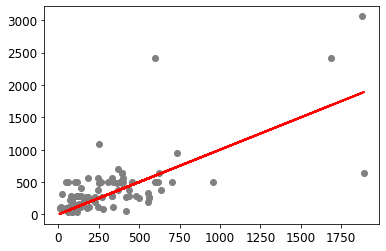

In [34]:
plt.scatter(y_test, predicted_dt,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show() #the gray dots are the predicted values. The red slope follows all the actual values

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg = LinearRegression()

In [38]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [39]:
lin_pred = lin_reg.predict(x_test)

In [40]:
lin_compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()}) #showing the difference
lin_compare_df

,Actual,Predicted
0,47,473.941349
1,185,363.965655
2,363,236.584129
3,368,584.193937
4,84,103.844560
5,335,288.753668
6,634,546.044478
7,225,261.519579
8,306,378.943324
9,83,500.581308


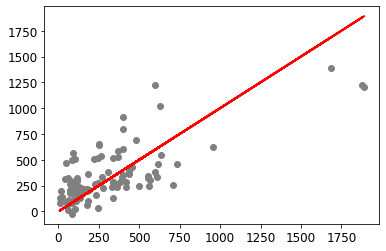

In [41]:
plt.scatter(y_test, lin_pred,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show()

In [42]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))

Mean Absolute Error: 174.80740619664655
Mean Squared Error: 53534.49391782187
Root Mean Squared Error: 231.37522321506654


In [44]:
r2_score(y_test, lin_pred)

0.5250154080228138

"Since R2 value is adopted in various research discipline, there is no standard guideline to determine the  level of predictive acceptance. Henseler (2009) proposed a rule of thumb for acceptable R2 with 0.75, 0.50, and 0.25 are described as substantial, moderate and weak respectively."

( Henseler, J., Ringle, C., and Sinkovics, R. (2009). "The use of partial least squares path modeling in international marketing." Advances in International Marketing (AIM), 20, 277-320)

## Stochastic Gradient Descent - SGD

In [45]:
from sklearn.linear_model import SGDRegressor

In [46]:
sgd_reg = SGDRegressor(random_state=random_state)

In [47]:
sgd_reg.fit(x_train_scaled, y_train)

SGDRegressor(random_state=88)

In [48]:
sgd_pred = sgd_reg.predict(x_test_scaled)

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, sgd_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, sgd_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, sgd_pred)))

Mean Absolute Error: 169.4129459944119
Mean Squared Error: 55050.78945117417
Root Mean Squared Error: 234.6290464779972


In [50]:
r2_score(y_test, sgd_pred)

0.5115620817182494

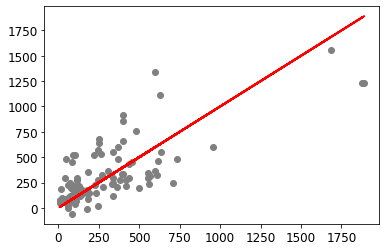

In [51]:
plt.scatter(y_test, sgd_pred,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show()

## KNN Nearest Neighbour

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
knn_reg = KNeighborsRegressor() #there is no random_state option

In [54]:
knn_reg.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [55]:
knn_pred = knn_reg.predict(x_test_scaled)

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

Mean Absolute Error: 140.70833333333334
Mean Squared Error: 38624.512500000004
Root Mean Squared Error: 196.53119981315945


In [57]:
r2_score(y_test, knn_pred)

0.6573041609715722

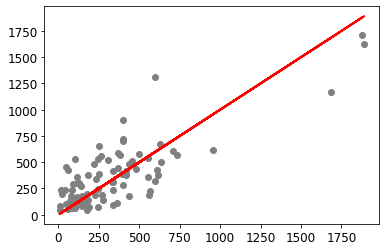

In [58]:
plt.scatter(y_test, knn_pred,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show()

## Gaussian Process Regression (GPR)

In [59]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [60]:
gpr_reg = GaussianProcessRegressor(random_state=random_state)

In [61]:
gpr_reg.fit(x_train_scaled, y_train)

GaussianProcessRegressor(random_state=88)

In [62]:
gpr_pred = gpr_reg.predict(x_test_scaled)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gpr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gpr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gpr_pred)))

Mean Absolute Error: 216.29837471764628
Mean Squared Error: 145327.09362053426
Root Mean Squared Error: 381.21790831561714


In [64]:
r2_score(y_test, gpr_pred)

-0.289414080808188

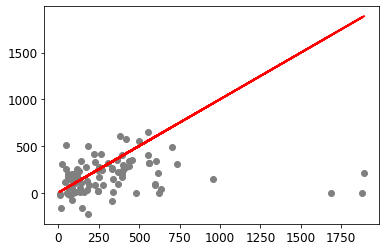

In [65]:
plt.scatter(y_test, gpr_pred,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show()

## Support Vector Machines Regression

In [66]:
from sklearn.svm import SVR

In [67]:
regr_svm = SVR() #no random_state

In [68]:
regr_svm.fit(x_train_scaled, y_train)

SVR()

In [69]:
svm_pred = regr_svm.predict(x_test_scaled)

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svm_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))

Mean Absolute Error: 190.43135643144421
Mean Squared Error: 113240.36954811138
Root Mean Squared Error: 336.512064491173


In [71]:
r2_score(y_test, svm_pred)

-0.004724744530542724

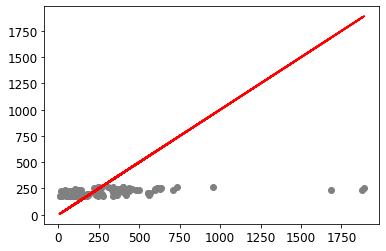

In [72]:
plt.scatter(y_test, svm_pred,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show()

## Kernel Ridge Regression

In [73]:
from sklearn.kernel_ridge import KernelRidge

In [74]:
regr_kern = KernelRidge()

In [75]:
regr_kern.fit(x_train_scaled, y_train)

KernelRidge()

In [76]:
kern_pred = regr_kern.predict(x_test_scaled)

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, kern_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, kern_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, kern_pred)))

Mean Absolute Error: 337.48946199842834
Mean Squared Error: 151510.91133140164
Root Mean Squared Error: 389.24402542801045


In [78]:
r2_score(y_test, kern_pred)

-0.34427997973246693

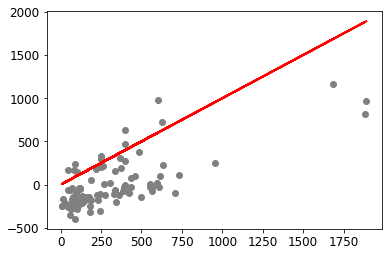

In [79]:
plt.scatter(y_test, kern_pred,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show()

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf_reg = RandomForestRegressor(random_state=random_state)
rf_reg.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=88)

In [82]:
predicted_rf_reg = rf_reg.predict(x_test_scaled)

In [83]:
r2_score(y_test, predicted_rf_reg)

0.6569371642527977

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_rf_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_rf_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_rf_reg)))

Mean Absolute Error: 138.459375
Mean Squared Error: 38665.8759125
Root Mean Squared Error: 196.6364053589772


In [85]:
rf_reg_compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted_rf_reg.flatten()}) #showing the difference
rf_reg_compare_df

,Actual,Predicted
0,47,455.73
1,185,440.52
2,363,194.05
3,368,499.54
4,84,59.72
5,335,276.21
6,634,516.12
7,225,432.84
8,306,423.92
9,83,368.20


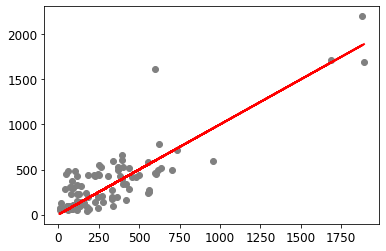

In [86]:
plt.scatter(y_test, predicted_rf_reg,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.show()

## Grid Search for Random Forest

Grid Search with Cross Validation:
Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

In [87]:
rf = RandomForestRegressor(random_state=random_state)

In [88]:
# hyperparameters
from sklearn.model_selection import GridSearchCV
params_grid_rf = {
    'bootstrap': [False,True],
    'max_depth': [40,50,60],
    'max_features':['sqrt','auto'],
    'min_samples_leaf' : [1,10,20,30],
    'min_samples_split' : [10,12,14,16],
    'n_estimators': [200,500,700]}
# Grid search 
grid_search_rf = GridSearchCV(estimator = rf,
                              param_grid = params_grid_rf,
                              scoring='r2',
                              cv = 5, 
                              n_jobs=-1)

grid_search_rf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=88), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'max_depth': [40, 50, 60],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 10, 20, 30],
                         'min_samples_split': [10, 12, 14, 16],
                         'n_estimators': [200, 500, 700]},
             scoring='r2')

In [89]:
grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 700}

In [90]:
best_grid = RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',min_samples_leaf=1,
                      min_samples_split=10, n_estimators=700, random_state=random_state)

In [91]:
best_grid.fit(x_train_scaled, y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=10, n_estimators=700, random_state=88)

In [92]:
best_grid_predicted_rf_reg = best_grid.predict(x_test_scaled)

In [93]:
r2_score(y_test, best_grid_predicted_rf_reg)

0.6929080965526518

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, best_grid_predicted_rf_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, best_grid_predicted_rf_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, best_grid_predicted_rf_reg)))

Mean Absolute Error: 134.39690813373954
Mean Squared Error: 34611.66933622138
Root Mean Squared Error: 186.04211710314786


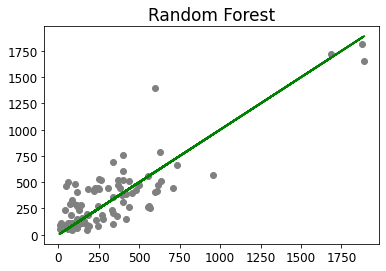

In [158]:
plt.scatter(y_test, best_grid_predicted_rf_reg,  color='gray')
plt.plot(y_test, y_test, color='green', linewidth=2)

plt.title("Random Forest", size=17)

plt.show()

In [96]:
best_predicted_rf_reg_comp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': best_grid_predicted_rf_reg.flatten()})
best_predicted_rf_reg_comp

,Actual,Predicted
0,47,467.550691
1,185,432.424372
2,363,174.977670
3,368,476.948793
4,84,60.388514
5,335,356.105940
6,634,510.041773
7,225,448.206967
8,306,446.299563
9,83,327.535842


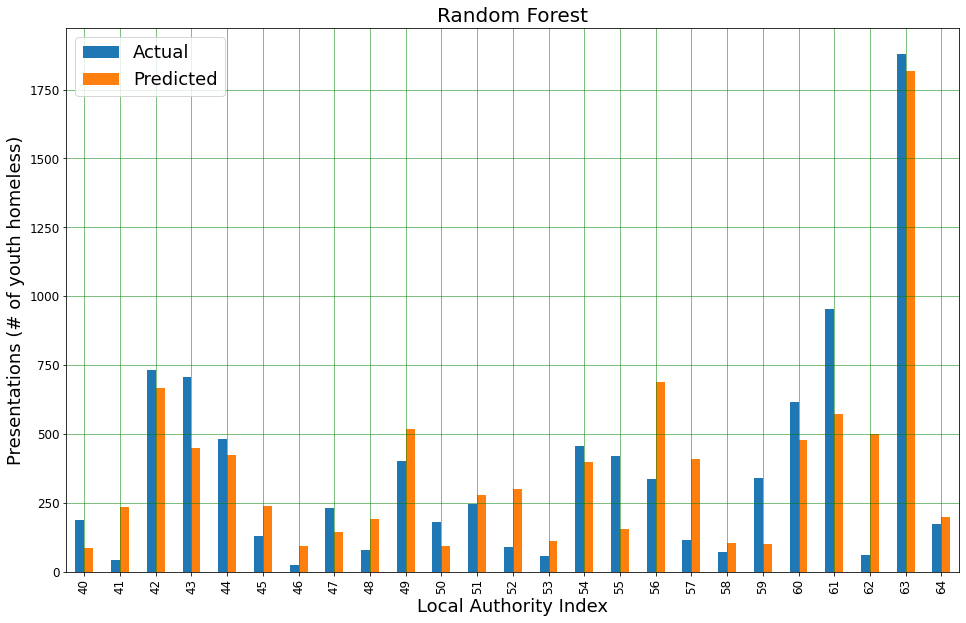

In [169]:
rf_compare_df_visual = best_predicted_rf_reg_comp.iloc[40:65]
rf_compare_df_visual.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(loc=2, prop={'size': 18})
plt.xlabel("Local Authority Index", size = 18)
plt.ylabel("Presentations (# of youth homeless)", size = 18)
plt.title("Random Forest", size=20)


plt.show() #sHOWING A SEGMENT OF THE PREDICTION

In [98]:
from sklearn.model_selection import cross_val_score

scores_r2_rf = cross_val_score(best_grid, x_train_scaled, y_train, scoring='r2', cv=10)
scores_r2_rf

array([0.54144292, 0.35142788, 0.6294536 , 0.58676244, 0.63567543,
       0.46202021, 0.58900015, 0.3475177 , 0.53523625, 0.54258085])

In [99]:
scores_r2_rf.mean()

0.5221117419990731

In [100]:
scores_mae_rf = cross_val_score(best_grid, x_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=10)
scores_mae_rf

array([-140.49273607, -118.32745449, -166.28558732, -147.79261729,
       -170.03140448, -141.24801734, -145.31238173, -125.18122843,
       -130.09600585, -114.33991603])

In [101]:
scores_mae_rf.mean()

-139.9107349011264

In [102]:
scores_mse_rf = cross_val_score(best_grid, x_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)
scores_mse_rf

array([-66492.30089159, -35645.07334448, -97395.85663559, -83481.96318843,
       -60391.78965468, -61549.78062724, -50574.5425117 , -35337.27082988,
       -29829.44151843, -24221.40595704])

In [103]:
scores_mse_rf.mean()

-54491.94251590631

## XG Boost

In [104]:
conda install -c conda-forge xgboost --- #USE IF NOT INSTALLED

In [105]:
import xgboost; print(xgboost.__version__) #checks for version

In [106]:
from xgboost import XGBRegressor

In [107]:
xgb_reg = XGBRegressor(random_state=random_state)

In [108]:
xgb_reg.fit(x_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=88,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
predicted_xgb_reg = xgb_reg.predict(x_test_scaled)

In [110]:
r2_score(y_test, predicted_xgb_reg)

0.7150298713769776

In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_xgb_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_xgb_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_xgb_reg)))

Mean Absolute Error: 125.36270987987518
Mean Squared Error: 32118.371575014895
Root Mean Squared Error: 179.21599140426866


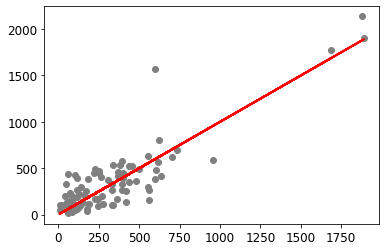

In [112]:
plt.scatter(y_test, predicted_xgb_reg,  color='gray')
plt.plot(y_test, y_test, color='red', linewidth=2)


plt.show()

In [113]:
xgb_compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted_xgb_reg.flatten()}) #showing the difference
xgb_compare_df

,Actual,Predicted
0,47,335.680634
1,185,384.770905
2,363,166.602020
3,368,457.852234
4,84,31.421457
5,335,328.673798
6,634,412.148438
7,225,487.575378
8,306,373.990295
9,83,200.601242


## Randomized Search for XG Boost

In [114]:
from sklearn.model_selection import RandomizedSearchCV


params = { 'max_depth': [20, 30, 40],
           'learning_rate': [0.001, 0.01, 1],
           'colsample_bylevel': [0.1, 0.3, 0.5],
           'n_estimators': [50, 100, 300]}


xgb_random = RandomizedSearchCV(estimator=xgb_reg,
                         param_distributions=params,
                         scoring='r2',
                         n_iter=20,
                         verbose=1)

xgb_random.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=12,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=88, reg_alpha=0,
     

In [115]:
xgb_random.best_params_

{'n_estimators': 300,
 'max_depth': 30,
 'learning_rate': 0.01,
 'colsample_bylevel': 0.1}

In [116]:
best_xgb = XGBRegressor(n_estimators= 300, max_depth= 30, learning_rate= 0.01,
                        colsample_bylevel = 0.3, random_state=random_state)

In [117]:
best_xgb.fit(x_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.3,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=30, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=88,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
predicted_xgb_random = best_xgb.predict(x_test_scaled)

In [119]:
r2_score(y_test, predicted_xgb_random)

0.7500547347873708

In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_xgb_random))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_xgb_random))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_xgb_random)))

Mean Absolute Error: 123.49406311909358
Mean Squared Error: 28170.79439275064
Root Mean Squared Error: 167.84157528083034


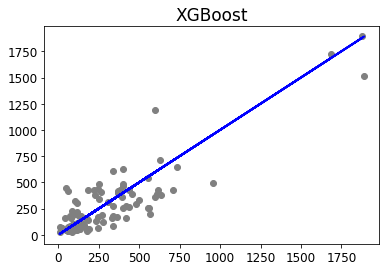

In [178]:
plt.scatter(y_test, predicted_xgb_random,  color='gray')
plt.plot(y_test, y_test, color='blue', linewidth=2)

plt.title("XGBoost", size=17)

plt.show()

In [122]:
xgb_compare_random_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted_xgb_random.flatten()}) #showing the difference
xgb_compare_random_df

,Actual,Predicted
0,47,445.379211
1,185,430.352325
2,363,169.403198
3,368,396.796478
4,84,46.932549
5,335,276.311951
6,634,378.458435
7,225,383.259521
8,306,311.562866
9,83,230.068085


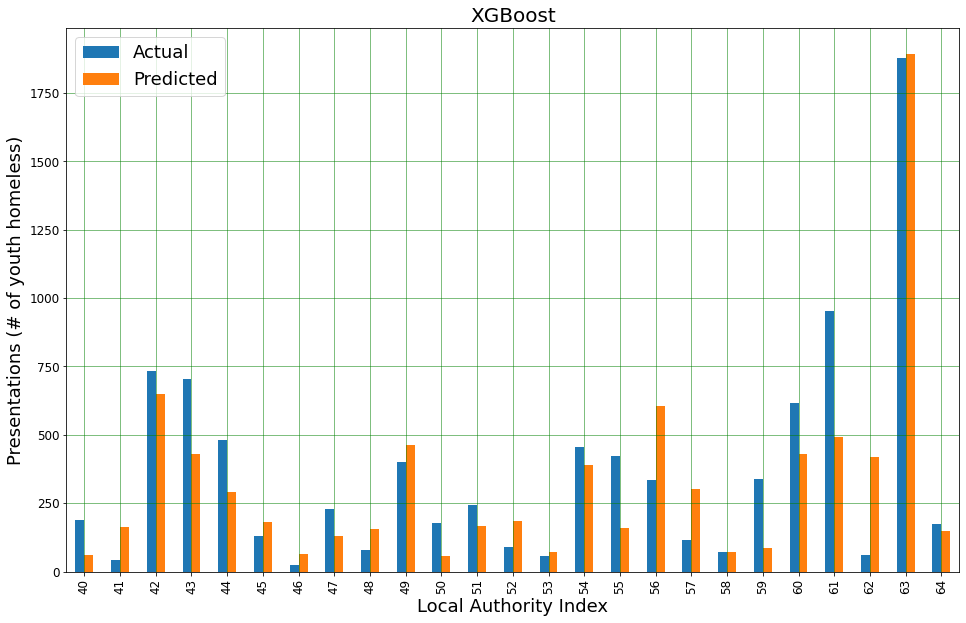

In [168]:
xgb_compare_df_visual = xgb_compare_random_df.iloc[40:65]
xgb_compare_df_visual.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(loc=2, prop={'size': 18})
plt.xlabel("Local Authority Index", size = 18)
plt.ylabel("Presentations (# of youth homeless)", size = 18)
plt.title("XGBoost", size=20)


plt.show() #sHOWING A SEGMENT OF THE PREDICTION

In [172]:
scores_r2_xgb = cross_val_score(best_xgb, x_train_scaled, y_train, scoring='r2', cv=10) #for reference
scores_r2_xgb

array([0.46492728, 0.14201179, 0.60993821, 0.48094542, 0.46751716,
       0.52809495, 0.60906545, 0.6167833 , 0.54498479, 0.51830565])

In [173]:
scores_r2_xgb.mean()

0.4982573992393828

In [174]:
scores_mae_xgb = cross_val_score(best_xgb, x_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=10)
scores_mae_xgb

array([-141.72700784, -116.96238708, -161.30770285, -162.73201791,
       -190.30567842, -130.06376086, -142.9575362 , -105.93882029,
       -127.19267634, -111.1821008 ])

In [175]:
scores_mae_xgb.mean()

-139.03696885810368

In [176]:
scores_mse_xgb = cross_val_score(best_xgb, x_train_scaled, y_train, scoring='neg_mean_squared_error', cv=10)
scores_mse_xgb

array([ -77587.32301812,  -47154.43629929, -102525.35953118,
       -104859.04211288,  -88266.3275147 ,  -53990.22952182,
        -48105.45818885,  -20754.32886721,  -29203.76130705,
        -25506.83394123])

In [177]:
scores_mse_xgb.mean()

-59795.31003023298

## Feature Importance - Optimized Random Forest

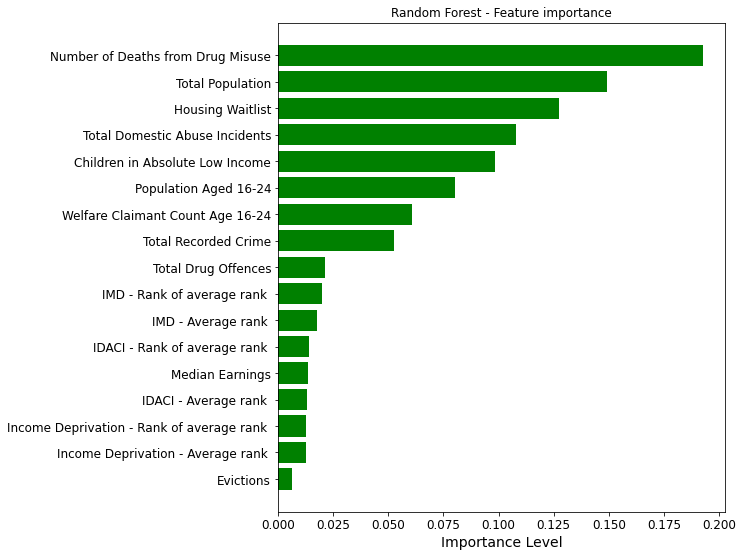

In [183]:
features_list = x_df.columns.values
feature_importance = best_grid.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,9))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="green")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance Level')
plt.title('Random Forest - Feature importance')
plt.draw()
plt.show()


## Feature Importance - Optimized XGBoost

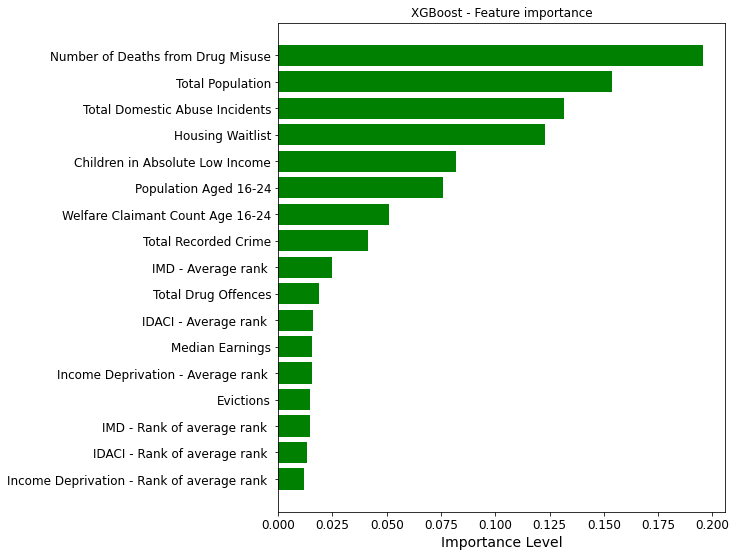

In [184]:
features_list = x_df.columns.values
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,9))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="green")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance Level')
plt.title('XGBoost - Feature importance')
plt.draw()
plt.show()


## PCA - extra work unused in dissertation

In [181]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10) #specifying the number of features to analyze
pca.fit(x_train_scaled) #fit to training data
pca.explained_variance_ratio_

array([0.59969829, 0.20667203, 0.0633615 , 0.04669744, 0.02504813,
       0.01431761, 0.01199677, 0.00929896, 0.00691278, 0.00478863])

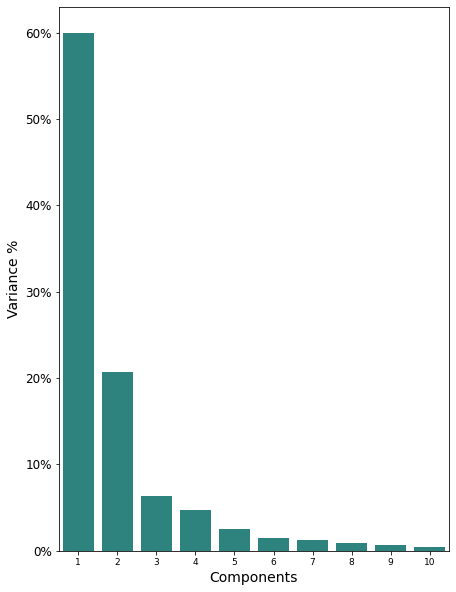

In [182]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from sklearn import decomposition

# setup figure
fig = plt.figure(figsize=(7,10));
ax = fig.add_subplot(111);

# plot bar chart
sns.barplot(x=np.arange(1,11), y=pca.explained_variance_ratio_, color='#21918c');

# change label properties
plt.ylabel('Variance %');
plt.xlabel('Components')
plt.xticks(size=9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0)) # change y label to display as percentage

plt.show();